In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
open_df = pd.read_csv('./FinalExtractedFeature_open.csv',).assign(label = 1).iloc[:,1:]

In [3]:
print(f'open dcd size : {open_df.shape}')
open_df.head()

open dcd size : (1725, 69)


,frame,RBD_CA0:ROF,RBD_CA0:DNS,RBD_CA0:RMSD,RBD__2__CH_CA0,CH_CA0:ROF,CH_CA0:DNS,CH_CA0:RMSD,RBD__2__GLY10,GLY10:ROF,...,GLY56:RMSD,RBD__2__GLY58,GLY58:ROF,GLY58:DNS,GLY58:RMSD,RBD__2__backbone0,backbone0:ROF,backbone0:DNS,backbone0:RMSD,label
0,frame_0,2.105982,0.839280,0.128618,8.828175,2.437207,0.296462,0.061250,3.157971,2.113537,...,0.262969,3.948743,3.192792,0.423470,0.215539,4.409722,4.913590,63.391320,0.103145,1
1,frame_1,2.103642,0.838257,0.094569,8.787868,2.437787,0.296101,0.075301,3.196104,2.142439,...,0.350527,3.964091,3.199213,0.422954,0.210782,4.387363,4.901446,63.314102,0.109079,1
2,frame_2,2.107826,0.839102,0.157485,8.770026,2.451860,0.296399,0.080360,3.165538,2.145147,...,0.451907,4.007900,3.134043,0.423381,0.224196,4.393290,4.903788,63.377930,0.130064,1
3,frame_3,2.119081,0.838189,0.179901,8.834404,2.428568,0.296077,0.073703,3.149749,2.103324,...,0.554632,4.024270,3.201054,0.422920,0.302514,4.424200,4.904225,63.308914,0.131233,1
4,frame_4,2.113981,0.837809,0.190200,8.836429,2.417723,0.295942,0.076017,3.113932,2.143304,...,0.617099,3.972770,3.110396,0.422728,0.451556,4.446843,4.906005,63.280200,0.128164,1


In [4]:
closed_df = pd.read_csv('./FinalExtractedFeature_close.csv').assign(label = 0).iloc[:,1:]

In [5]:
print(f'closed dcd size : {closed_df.shape}')
closed_df.head()

closed dcd size : (5435, 49)


,frame,RBD_CA0:ROF,RBD_CA0:DNS,RBD_CA0:RMSD,RBD__2__CH_CA0,CH_CA0:ROF,CH_CA0:DNS,CH_CA0:RMSD,RBD__2__GLY12,GLY12:ROF,...,GLY49:RMSD,RBD__2__GLY50,GLY50:ROF,GLY50:DNS,GLY50:RMSD,RBD__2__backbone0,backbone0:ROF,backbone0:DNS,backbone0:RMSD,label
0,frame_0,2.064992,0.245476,0.104537,7.011860,2.440622,0.133119,0.071946,3.802652,2.051790,...,0.134942,2.697315,4.052563,0.123859,0.265223,6.132472,7.333359,20.699986,0.137631,0
1,frame_1,2.082220,0.245485,0.142265,7.059966,2.451281,0.133124,0.067347,3.886217,2.006260,...,0.167273,2.680130,4.009193,0.123863,0.262429,6.172430,7.338856,20.700733,0.161682,0
2,frame_2,2.079883,0.245602,0.168931,7.061981,2.428138,0.133187,0.075575,3.975016,1.967352,...,0.173768,2.751318,4.020995,0.123922,0.287602,6.154211,7.331262,20.710602,0.173915,0
3,frame_3,2.105020,0.245436,0.156687,7.035488,2.423324,0.133097,0.076875,3.819205,2.034110,...,0.142312,2.686773,4.048179,0.123838,0.359175,6.143025,7.325061,20.696592,0.189567,0
4,frame_4,2.107028,0.245459,0.128242,6.968371,2.426547,0.133109,0.086771,3.884356,1.992679,...,0.170484,2.742874,4.042894,0.123850,0.385640,6.106590,7.313821,20.698494,0.198229,0


In [6]:
common_cols = set(open_df.columns.to_list()).intersection(closed_df.columns.to_list())
full_df = open_df.loc[:,common_cols].append(closed_df.loc[:,common_cols]).drop(['frame'],axis=1)
full_df.shape

<ipython-input-6-c2737a41af19>:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  full_df = open_df.loc[:,common_cols].append(closed_df.loc[:,common_cols]).drop(['frame'],axis=1)
<ipython-input-6-c2737a41af19>:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  full_df = open_df.loc[:,common_cols].append(closed_df.loc[:,common_cols]).drop(['frame'],axis=1)
<ipython-input-6-c2737a41af19>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_df = open_df.loc[:,common_cols].append(closed_df.loc[:,common_cols]).drop(['frame'],axis=1)


(7160, 28)

## Looking for Correlations

In [8]:
corr_matrix = full_df.corr()
final_features = corr_matrix['RBD_CA0:RMSD'][(corr_matrix['RBD_CA0:RMSD'] < 0.65) & (corr_matrix['RBD_CA0:RMSD'] > -0.65)].reset_index().loc[:,'index'].to_list()
clf_df = full_df.loc[:,final_features]

In [9]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(clf_df,test_size=0.3, random_state=42,stratify=full_df.label)
print(f'Train set : {train_set.shape}, Test set : {test_set.shape}')

Train set : (5012, 27), Test set : (2148, 27)


# Prepare the Data for Machine Learning Algorithms

In [10]:
train_X = train_set.drop("label", axis=1) # drop labels for training set
train_labels = train_set["label"].copy()
train_X.shape,train_labels.shape

((5012, 26), (5012,))

In [20]:
test_X = test_set.drop("label", axis=1) # drop labels for training set
test_labels = test_set["label"].copy()
test_X.shape, test_labels.shape

((2148, 26), (2148,))

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
       ('std_scaler', StandardScaler()),
    ])

train_X_prepared = num_pipeline.fit_transform(train_X)
test_X_prepared = num_pipeline.transform(test_X)

In [36]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=100, tol=1e-3, random_state=42)

In [53]:
from sklearn.model_selection import cross_val_score,cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,train_X_prepared, train_labels, cv=10)
cross_val_score(sgd_clf, train_X_prepared, train_labels, cv=10, scoring="accuracy")

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

## Precision and Recall

In [73]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
confusion_matrix(train_labels, y_train_pred)
print(f' Train precison : {precision_score(train_labels, y_train_pred)}, train recall {recall_score(train_labels, y_train_pred)}')

 Train precison : 1.0, train recall 1.0


 Test precison : 1.0, Test recall 1.0


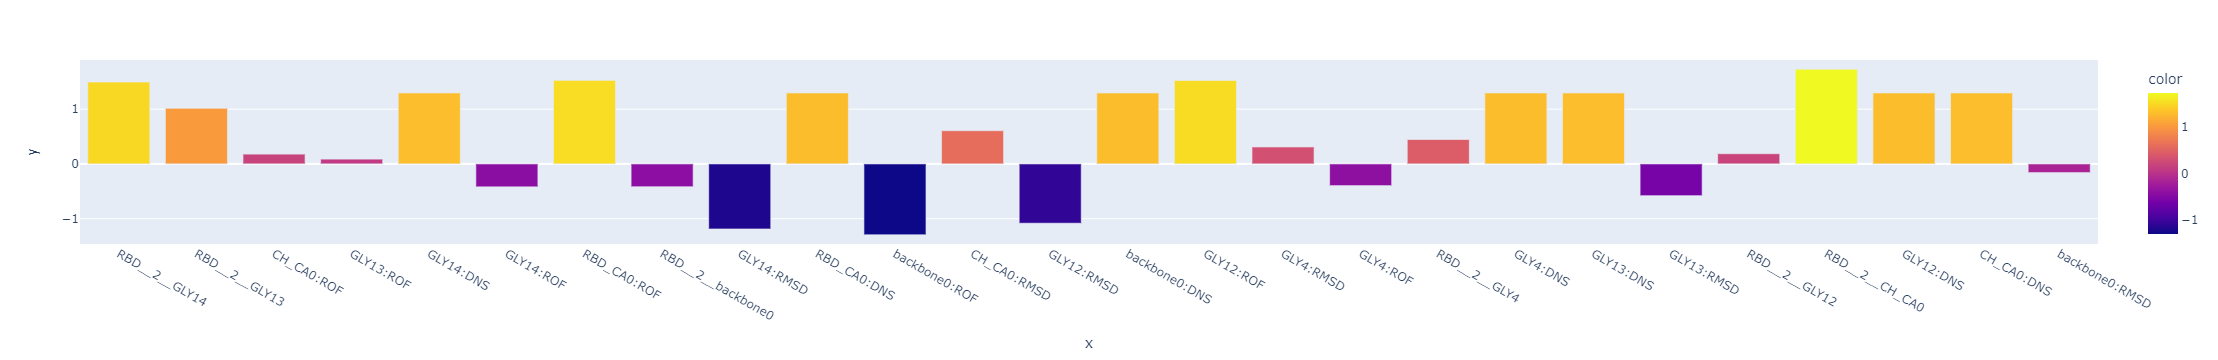

In [74]:
sgd_clf.fit(train_X_prepared,train_labels)
y_test_pred = sgd_clf.predict(test_X_prepared)
print(f' Test precison : {precision_score(test_labels, y_test_pred)}, Test recall {recall_score(test_labels, y_test_pred)}')
px.bar(x=train_X.columns.to_list(),y=sgd_clf.coef_[0],color=sgd_clf.coef_[0])

array([[<AxesSubplot:title={'center':'RBD__2__GLY14'}>,
        <AxesSubplot:title={'center':'RBD__2__GLY13'}>,
        <AxesSubplot:title={'center':'CH_CA0:ROF'}>,
        <AxesSubplot:title={'center':'GLY13:ROF'}>,
        <AxesSubplot:title={'center':'GLY14:DNS'}>],
       [<AxesSubplot:title={'center':'GLY14:ROF'}>,
        <AxesSubplot:title={'center':'RBD_CA0:ROF'}>,
        <AxesSubplot:title={'center':'RBD__2__backbone0'}>,
        <AxesSubplot:title={'center':'GLY14:RMSD'}>,
        <AxesSubplot:title={'center':'RBD_CA0:DNS'}>],
       [<AxesSubplot:title={'center':'backbone0:ROF'}>,
        <AxesSubplot:title={'center':'CH_CA0:RMSD'}>,
        <AxesSubplot:title={'center':'GLY12:RMSD'}>,
        <AxesSubplot:title={'center':'backbone0:DNS'}>,
        <AxesSubplot:title={'center':'GLY12:ROF'}>],
       [<AxesSubplot:title={'center':'GLY4:RMSD'}>,
        <AxesSubplot:title={'center':'GLY4:ROF'}>,
        <AxesSubplot:title={'center':'RBD__2__GLY4'}>,
        <AxesSubplot:title

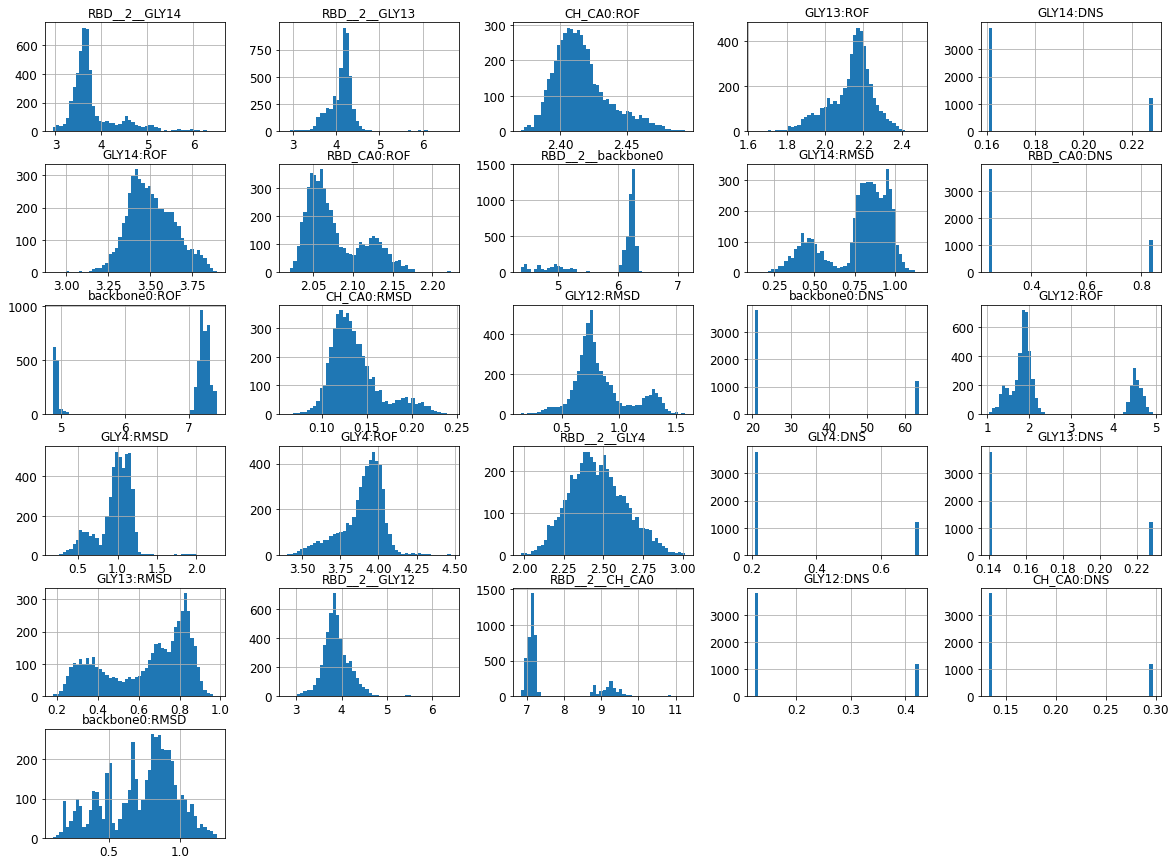

In [11]:
train_X.hist(bins=50, figsize=(20,15))